<a href="https://colab.research.google.com/github/kristinak15/QM2-Group-4/blob/main/nlp_api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd 
import pylab
%matplotlib inline
pylab.rcParams['figure.figsize'] = (10., 8.)
import nltk
nltk.download('book')
from nltk.book import *
from textblob import TextBlob

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to /root/nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to /root/nltk_data...
[nltk_data]    |   Package conll2002 is already up-to-date!
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package dependency_treebank is already up-to-date!
[nltk_data]    | Downloadi

In [ ]:
!mkdir nlp
!curl https://github.com/kristinak15/QM2-Group-4/blob/main/api.csv -o ./nlp/api.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  148k    0  148k    0     0   415k      0 --:--:-- --:--:-- --:--:--  415k


In [50]:
data = pd.read_csv('api.csv')

In [51]:
data.head()

,tweet,link,Unnamed: 2,Unnamed: 3
0,A German brand of food supplement organic and ...,https://t.co/bJyf5laljQ,NaN,NaN
1,RT @DrLeoRebello: The 5 Big Lies they do not w...,NaN,NaN,NaN
2,RT @ladydiaphanous: @___Prodigy___ @DrMadej @b...,NaN,NaN,NaN
3,@Chena_Punim Funny it’s a sign of zinc deficie...,https://t.co/Tmj7ffzAqH,NaN,NaN
4,RT @ChickenGate: @kirstiealley Check this out ...,NaN,NaN,NaN


In [53]:
data.drop(['Unnamed: 2','Unnamed: 3'], axis=1,inplace=True)

In [7]:
tweets = data.drop('link',axis=1)

In [8]:
value = 1 
tweets['value'] = value

In [9]:
tweets['tweet'] = tweets['tweet'].astype(str)

In [20]:
text = tweets.groupby('value')['tweet'].apply(' '.join).reset_index()

In [21]:
text

,value,tweet
0,1,A German brand of food supplement organic and ...


In [22]:
text = text.drop('value', axis=1)
text.reset_index(drop=True, inplace=True)

In [23]:
text['tweet'] = text['tweet'].astype(str)

In [24]:
text = text.iloc[0]['tweet']

In [25]:
text

'A German brand of food supplement organic and no gmo includin vitamin d supplement.  RT @DrLeoRebello: The 5 Big Lies they do not want you to find out.  RT @ladydiaphanous: @___Prodigy___ @DrMadej @bitchute The gates don\'t vaccinate.. they also grow their own food in bubble greenhouses and h… @Chena_Punim Funny it’s a sign of zinc deficiency, and zinc is good for immunity, and gmo crops have wrecked the so…  RT @ChickenGate: @kirstiealley Check this out Bill Gates caught on video admitting that his ‘experimental’ vaccine will CHANGE our DNA FORE… RT @GMOFreeUSA: #GMOs are invasive species and persistent pollution, and need to be treated as such. We need to work on changing our laws s… It is worth remembering what you’re advertising when you are doing advertising for Spotify.” RT @_ReddDotMedia: The only females left in the world are all GMO’d \U0001f92e @WrightBethani @NYGovCuomo Begging for the Vaccine? #WakeUp #GMO GMO GENETICALLY MODIFIED ORGANISM DNA test.  Non-GMO “Low-Allergen”

In [38]:
#We perform the general sentiment analysis
analysis = TextBlob(text)
print(analysis.sentiment)

#We then perform an sentiment analysis for all sentences found, meaning each Tweet.
analysis = analysis.sentences
print(analysis)

print('For each individual tweet, the polarity and subjectivity factors are as followed:')
iteration = 1
for sentence in analysis:
  print(iteration)
  print(sentence.sentiment)
  iteration = iteration+1


Sentiment(polarity=0.1345920172185995, subjectivity=0.5357206038218699)
[Sentence("A German brand of food supplement organic and no gmo includin vitamin d supplement."), Sentence("RT @DrLeoRebello: The 5 Big Lies they do not want you to find out."), Sentence("RT @ladydiaphanous: @___Prodigy___ @DrMadej @bitchute The gates don't vaccinate.. they also grow their own food in bubble greenhouses and h… @Chena_Punim Funny it’s a sign of zinc deficiency, and zinc is good for immunity, and gmo crops have wrecked the so…  RT @ChickenGate: @kirstiealley Check this out Bill Gates caught on video admitting that his ‘experimental’ vaccine will CHANGE our DNA FORE… RT @GMOFreeUSA: #GMOs are invasive species and persistent pollution, and need to be treated as such."), Sentence("We need to work on changing our laws s… It is worth remembering what you’re advertising when you are doing advertising for Spotify.” RT @_ReddDotMedia: The only females left in the world are all GMO’d 🤮 @WrightBethani @NYGovCu

In [ ]:
sentence = nltk.sent_tokenize(text)
tokens = nltk.word_tokenize(text)
simple_text = nltk.Text(tokens)
tagged = nltk.pos_tag(tokens)

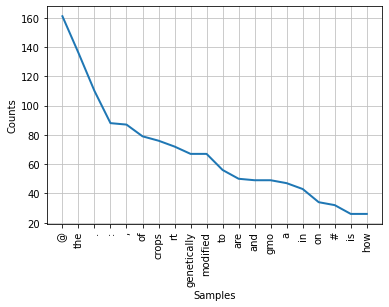

In [ ]:
fd = nltk.FreqDist(word.lower() for word in tokens)
fd.plot(20)

In [ ]:
#nouns
permitted_tags = set([
    'NN',
    'NNS',
    'NNP',
    'NNPS',
])
#adjectives
permitted_tags1 = set([
     'JJS',
    'JJ',
    'JJR',                   
])
#verbs
permitted_tags2 = set([
    'VB',
    'VBD',
    'VBG',
    'VBN',
    'VBP',
    'VPZ'
])

In [ ]:
import matplotlib.pyplot as plt


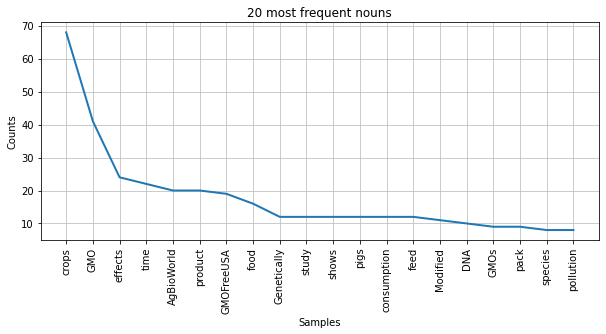

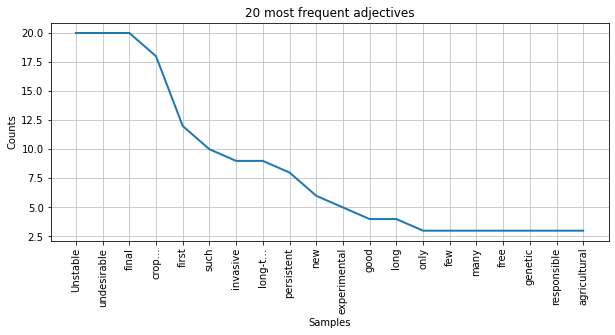

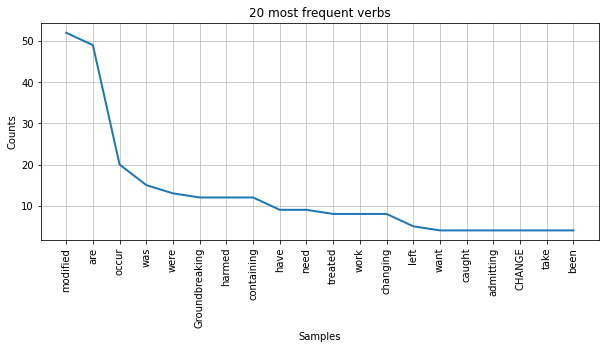

In [ ]:
fig = plt.figure(figsize = (10,4))
fd = nltk.FreqDist()

for bit in tagged:
    if bit[1] in permitted_tags and len(bit[0])>2:
        fd[bit[0]] = fd[bit[0]] + 1

plt.title('20 most frequent nouns')       
fd.plot(20)
plt.show()
fig.savefig('nouns')

fig = plt.figure(figsize = (10,4))
fd = nltk.FreqDist()

for bit in tagged:
    if bit[1] in permitted_tags1 and len(bit[0])>2:
        fd[bit[0]] = fd[bit[0]] + 1

plt.title('20 most frequent adjectives')        
fd.plot(20)
plt.show()
fig.savefig('adjectives')

fig = plt.figure(figsize = (10,4))
fd = nltk.FreqDist()

for bit in tagged:
    if bit[1] in permitted_tags2 and len(bit[0])>2:
        fd[bit[0]] = fd[bit[0]] + 1

plt.title('20 most frequent verbs')       
fd.plot(20)
plt.show()
fig.savefig('verbs')

In [ ]:
simple_text.collocations()

genetically modified; final product; rarely occur; effects rarely;
undesirable effects; modified ...; 2013 study; Groundbreaking 2013;
feed containing; shows pigs; study shows; first long-t…; modified
crops; Genetically Modified; persistent pollution; containing GMO;
invasive species; Modified Crops; Bill Gates; GMO crops
